# Setting up basic backbone of the api

### we can run the api using the following command

```bash
(tf) PS C:\Users\91630\Documents\Machince Learning\Practice\DeepLearning\Tensorflow> uvicorn main:app --reaload
```

**or**
```python

from fastapi import FastAPI
import uvicorn

app = FastAPI()


@app.get("/ping")
async def ping():
    return "Hello, I am alive!"


if __name__ == "__main__":
    uvicorn.run(app, host="localhost", port=8000)

```

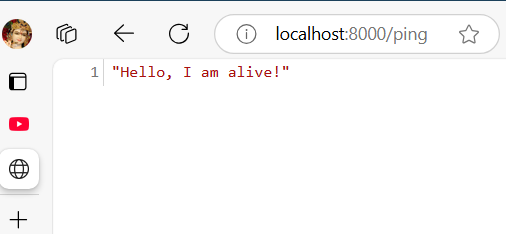

/docs
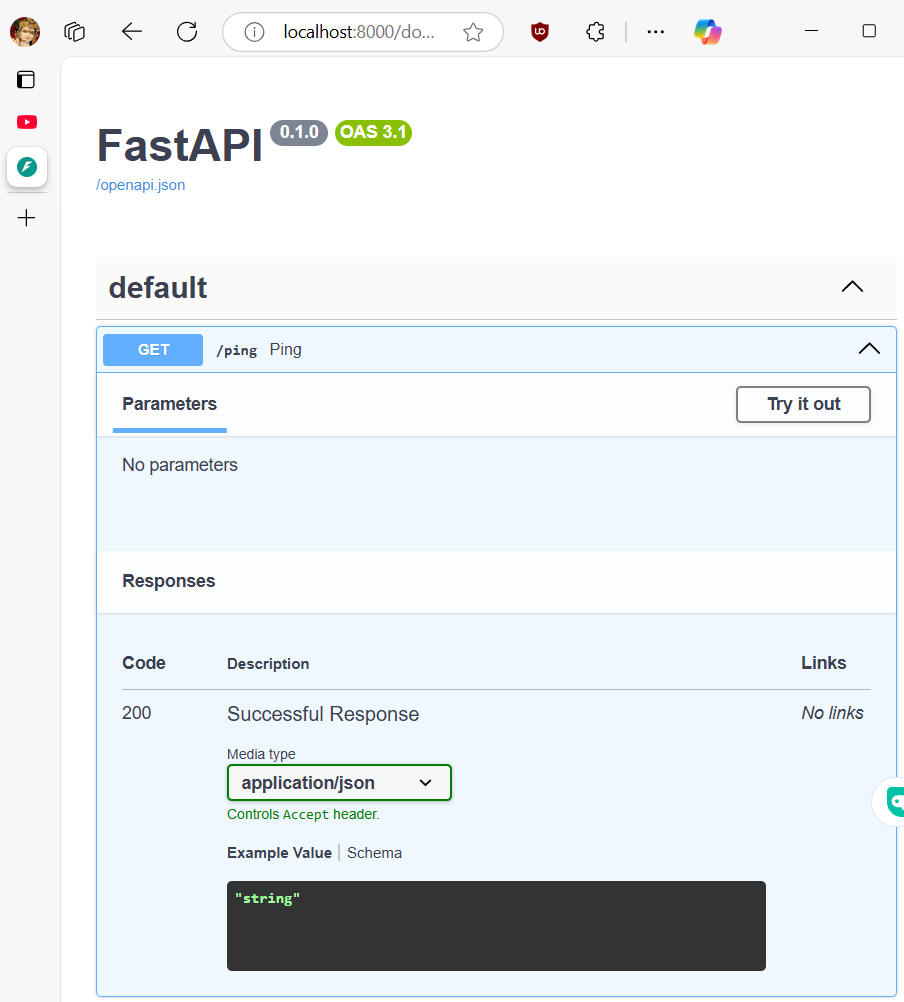

## Getting Image and Predicting the Image


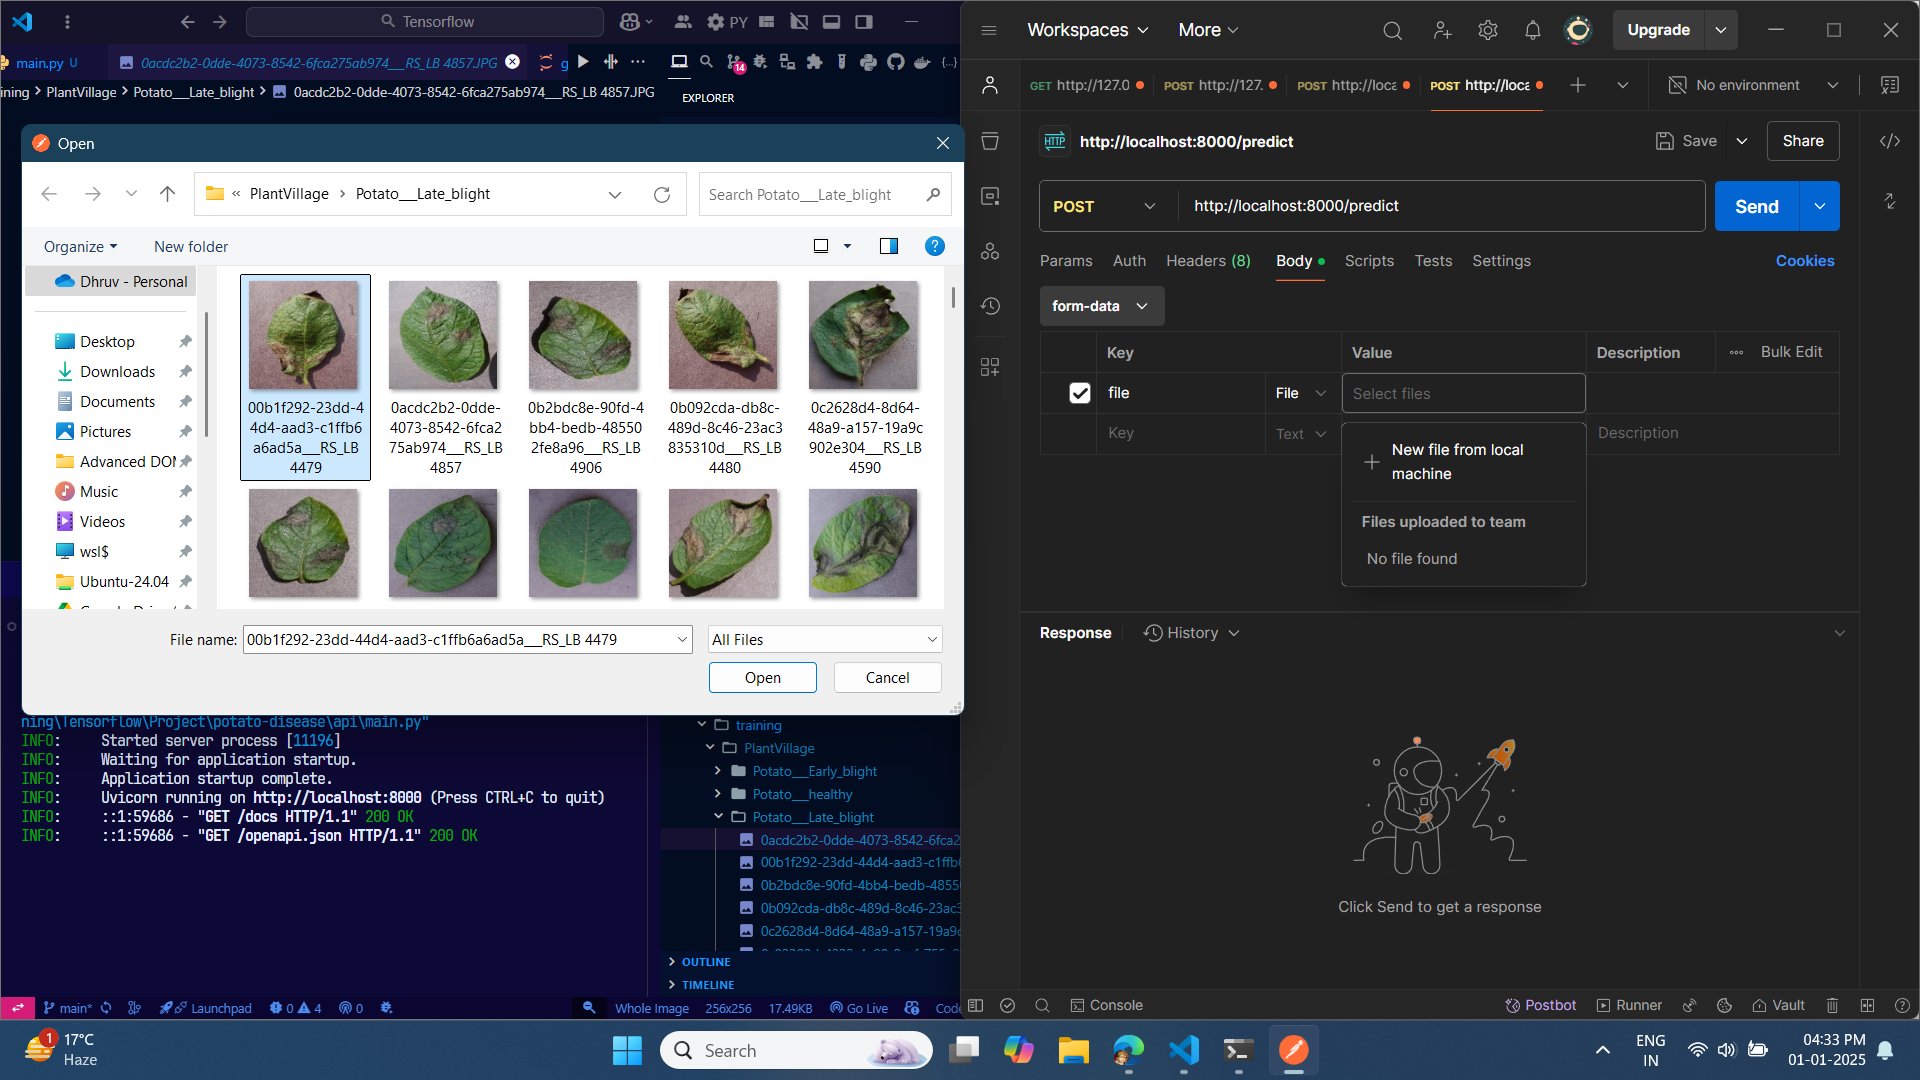

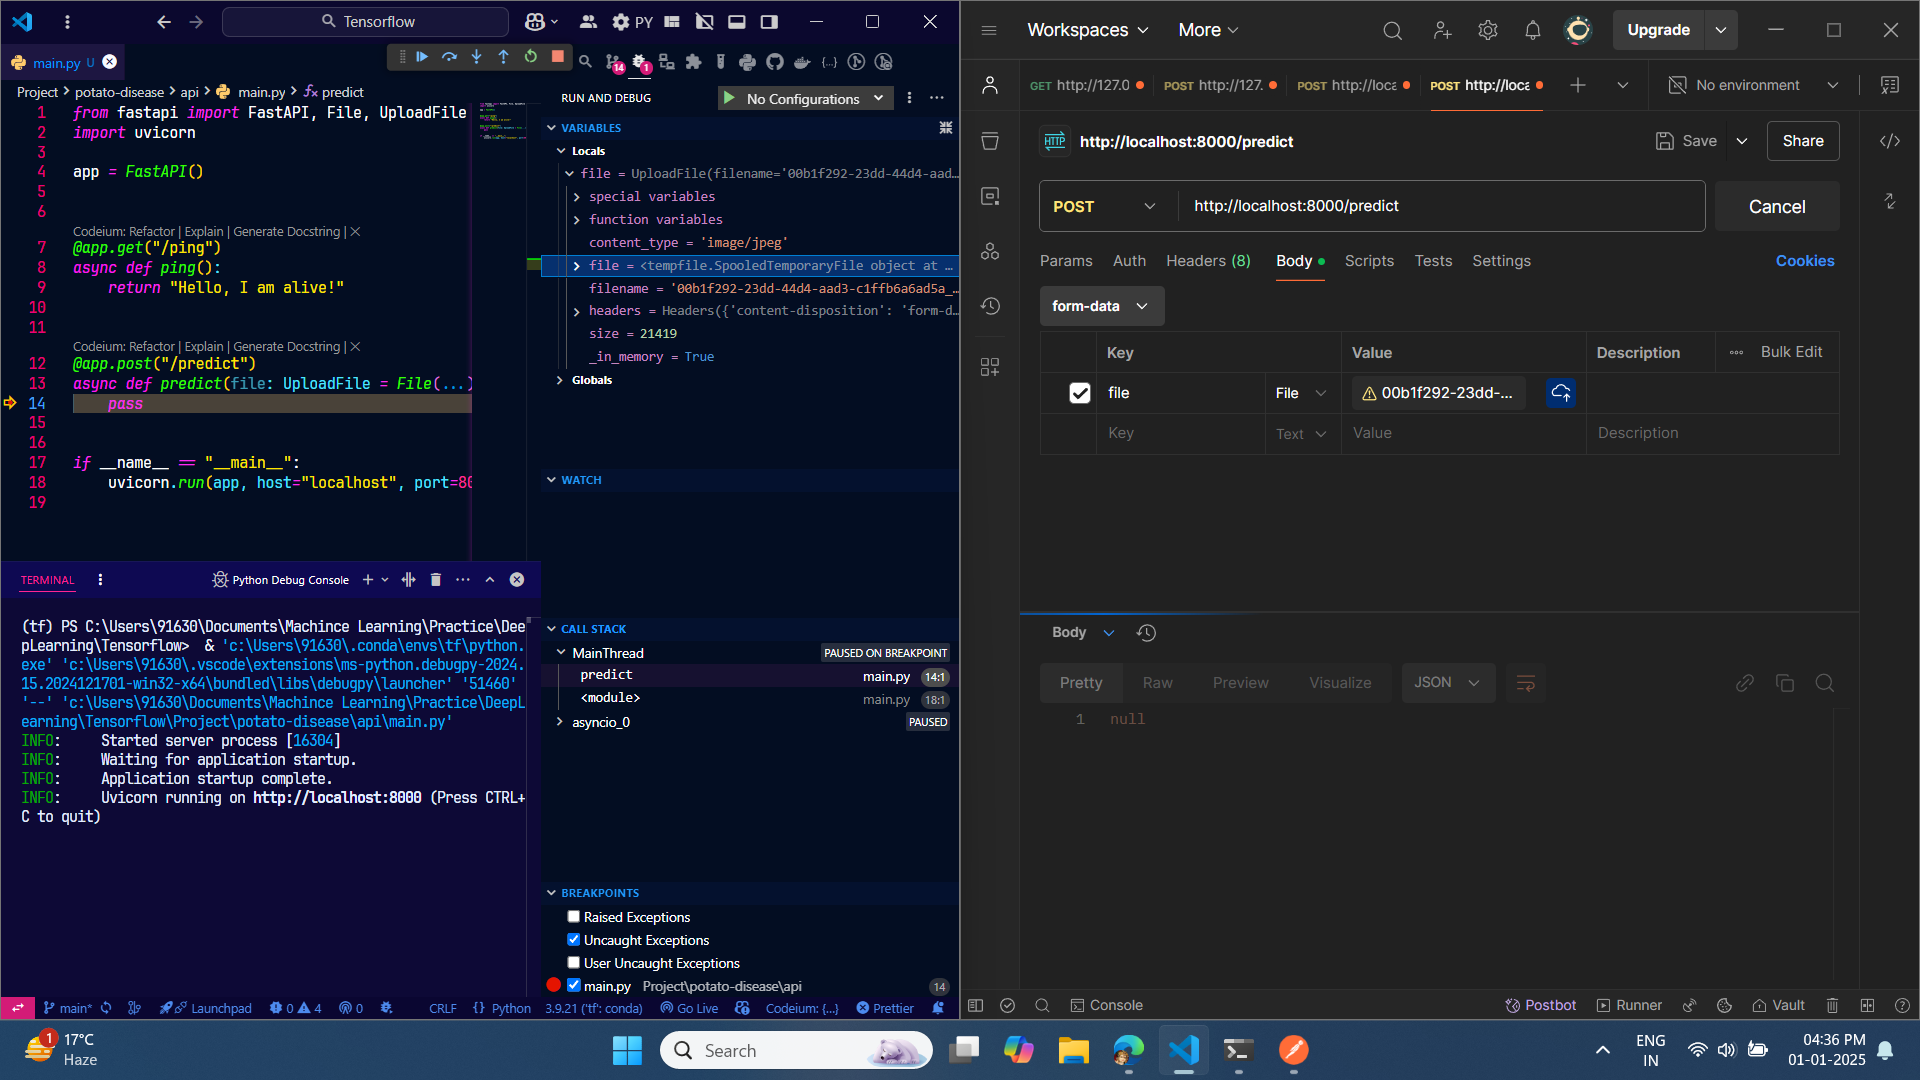

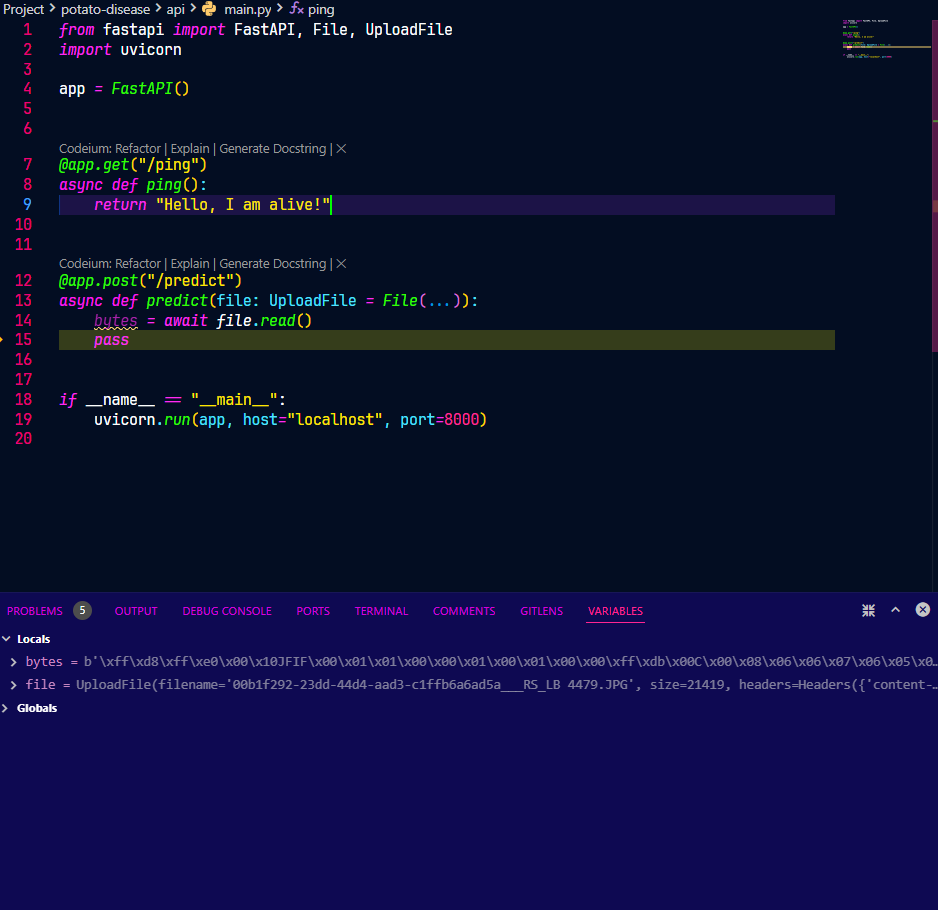

**Converting image to np array**

```python
def read_file_as_image(data) -> np.ndarray:
    image = Image.open(BytesIO(data))
    return np.array(image)


@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    image = read_file_as_image(await file.read())

```

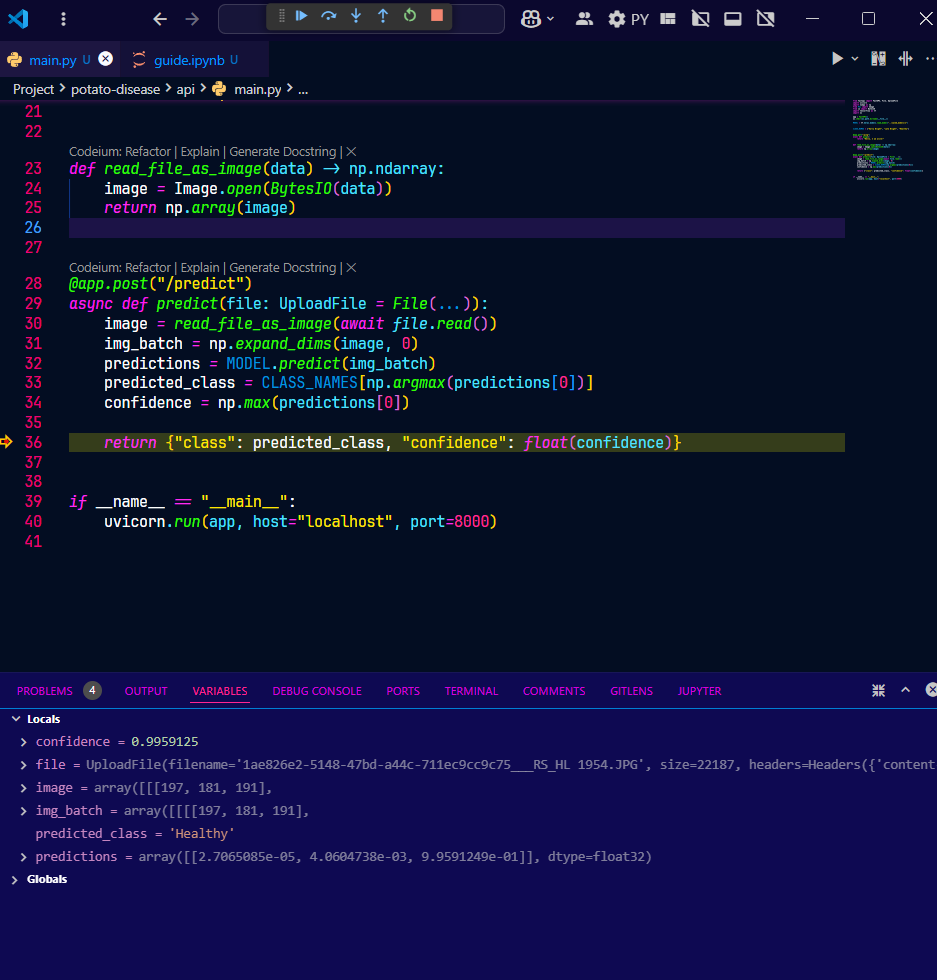

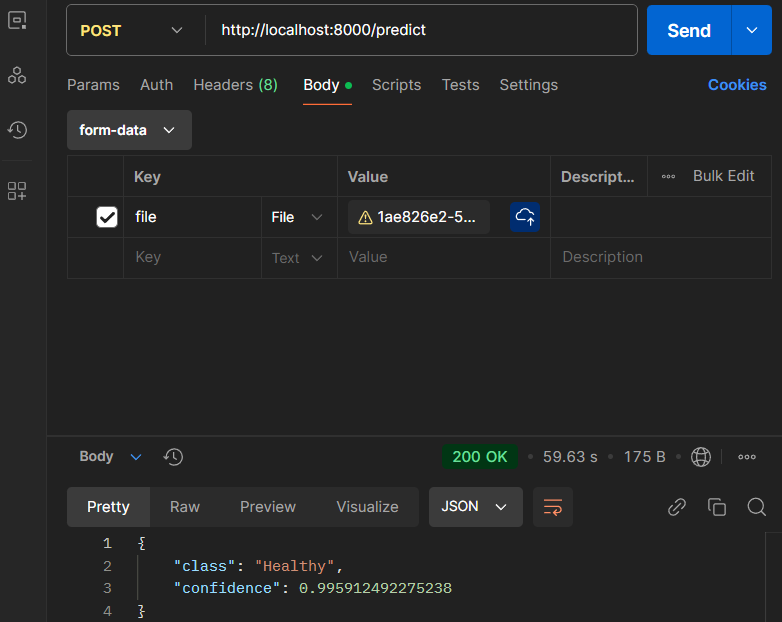

## Selecting models

we can select the models using the following code
```python
PORD_MODEL = tf.keras.models.load_model("../saved_models/1")
BETA_MODEL = tf.keras.models.load_model("../saved_models/2")
```
or use tfserve to load the models


### tfserving

```bash
docker run -t --rm -p 8501:8501 -v "C:/Users/91630/Documents/Machince Learning/Practice/DeepLearning/Tensorflow/Project/potato-disease:/potato-disease" tensorflow/serving --rest_api_port=8501 --model_config_file=/potato-disease/models.config

```
[models.config](../models.config):

```json
model_config_list {
  config {
    name: 'potatoes_model'
    base_path: '/potato-disease/saved_models'
    model_platform: 'tensorflow'
    model_version_policy: { all: {} }
  }
}
```

* creating a new main file for tf-serving [main-tf-serving](main-tf-serving.py)


```python
os.chdir(os.path.dirname(__file__))

endpoint = "http://localhost:8501/v1/models/potatoes_model:predict"

CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy"]
```

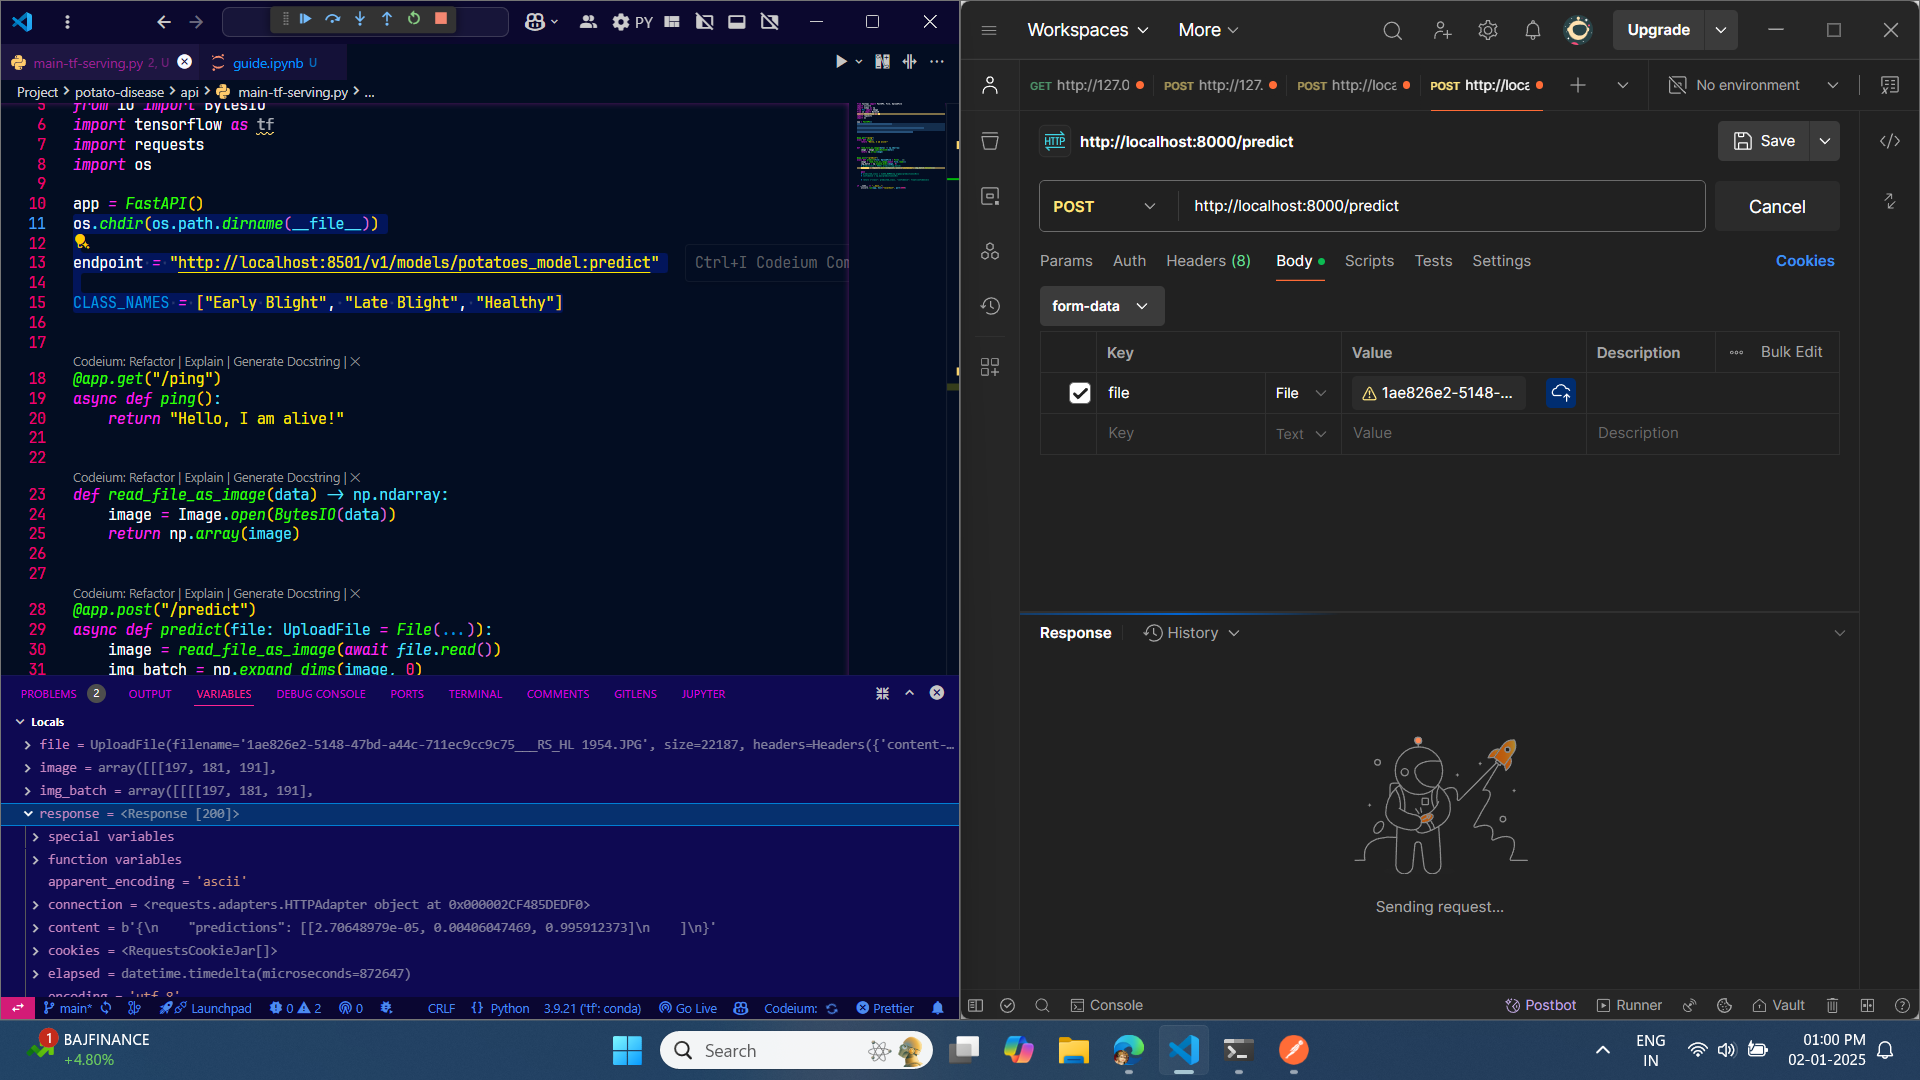

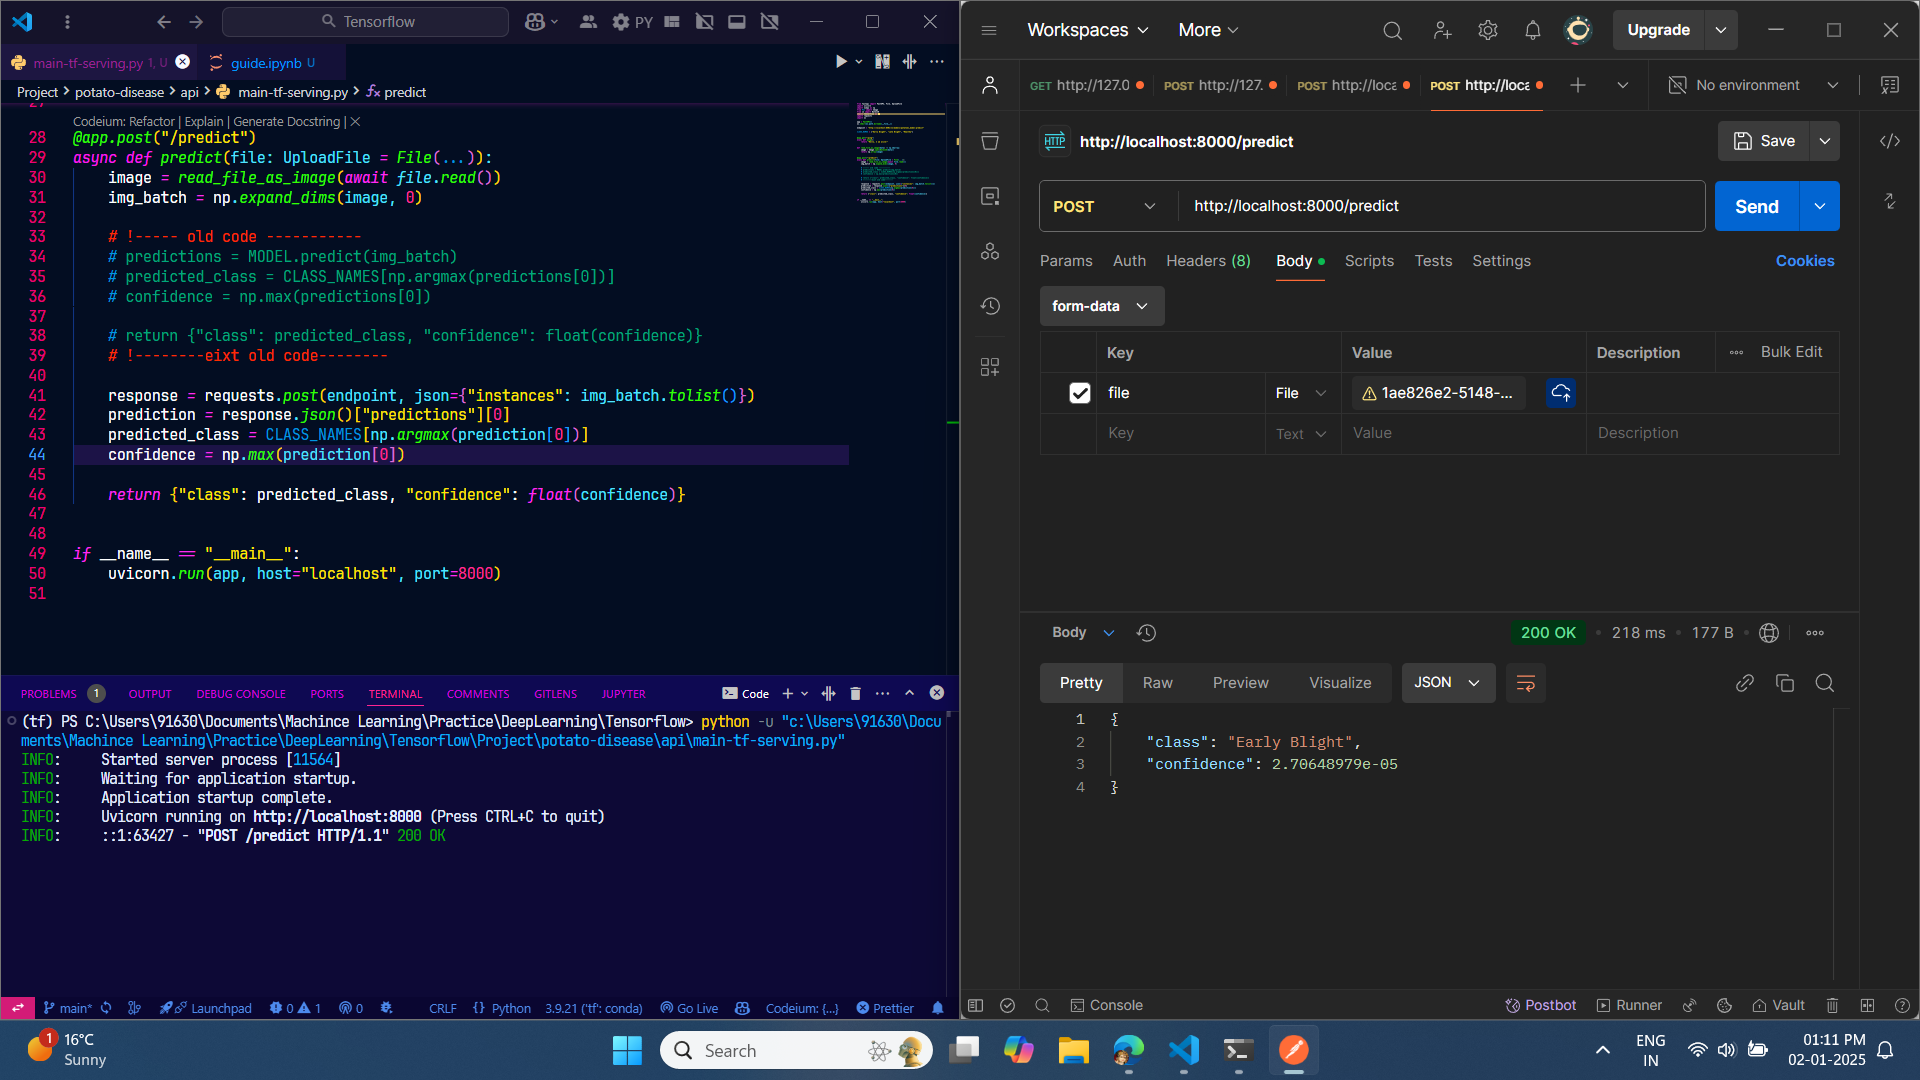

## Creating frontend

* copied the fronted code from web
  